# 2 RAFDB—YOLO-Classification Dataset

### Generate yolo labels files for classification tasks

In [1]:
import os

def process_yolo_labels(input_folder, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for file_name in os.listdir(input_folder):
        if file_name.endswith('.txt'):
            input_file_path = os.path.join(input_folder, file_name)

            with open(input_file_path, 'r') as file:
                lines = file.readlines()

            output_lines = []
            for line in lines:
                parts = line.strip().split()
                if len(parts) >= 5:
                    label = parts[0]
                    bbox = [0.5, 0.5, 1.0, 1.0]
                    output_line = f"{label} {' '.join(map(str, bbox))}\n"
                    output_lines.append(output_line)
                else:
                    print(f"Warning: File {file_name} line format incorrect: {line}")

            output_file_name = file_name.replace('.txt', '_aligned.txt')
            output_file_path = os.path.join(output_folder, output_file_name)
            with open(output_file_path, 'w') as output_file:
                output_file.writelines(output_lines)

            print(f"Processed and saved: {output_file_path}")

In [10]:
input_folder = '/Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Detection_labels'  
output_folder = '/Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels'  

process_yolo_labels(input_folder, output_folder)

Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_10727_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_08168_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/test_2486_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_00534_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_06145_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_09276_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_11439_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_12130_aligned.txt
Processed and saved: /Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/train_023

### Test the labels for correctness

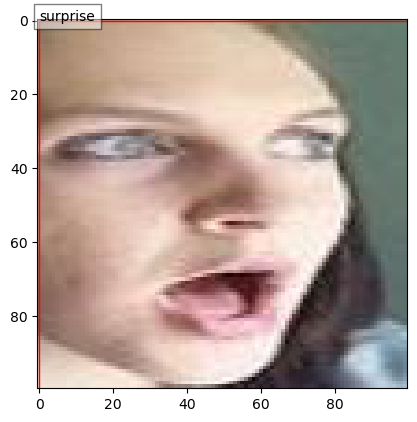

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

classes = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']

image_path = r'/Users/piglet/Desktop/Project_Code/RAFDB/aligned/test_0004_aligned.jpg'
img = Image.open(image_path)

label_path = r'/Users/piglet/Desktop/Project_Code/RAFDB/YOLO_Classification_labels/test_0004_aligned.txt'
with open(label_path, 'r') as f:
    labels = f.readlines()

fig, ax = plt.subplots(1)
ax.imshow(img)

width, height = img.size

for label in labels:
    parts = label.strip().split()
    class_id = int(parts[0])
    x_center = float(parts[1]) * width
    y_center = float(parts[2]) * height
    bbox_width = float(parts[3]) * width
    bbox_height = float(parts[4]) * height
    xmin = x_center - bbox_width / 2
    ymin = y_center - bbox_height / 2
    rect = patches.Rectangle((xmin, ymin), bbox_width, bbox_height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.text(xmin, ymin, classes[class_id], bbox=dict(facecolor='white', alpha=0.5))

plt.show()


### Split the RAFDB-YOLO-Classification dataset according to 7:2:1

In [11]:
import os
import shutil
import random

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def move_files(file_list, src_img_dir, src_lbl_dir, dst_img_dir, dst_lbl_dir):
    for file in file_list:
        img_path = os.path.join(src_img_dir, file)
        lbl_path = os.path.join(src_lbl_dir, file.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(img_path) and os.path.exists(lbl_path):
            shutil.move(img_path, dst_img_dir)
            shutil.move(lbl_path, dst_lbl_dir)

def split_dataset(img_dir, lbl_dir, train_ratio=0.7, valid_ratio=0.2, test_ratio=0.1):
    images = [f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))]
    random.shuffle(images)

    total_count = len(images)
    train_count = int(total_count * train_ratio)
    valid_count = int(total_count * valid_ratio)

    train_files = images[:train_count]
    valid_files = images[train_count:train_count + valid_count]
    test_files = images[train_count + valid_count:]

    return train_files, valid_files, test_files

def main():
    img_dir = '/Users/piglet/Desktop/workspace/RAFDB-classification(images+labels)/aligned'
    lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB-classification(images+labels)/YOLO_Classification_labels'

    train_img_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/train/images'
    train_lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/train/labels'
    valid_img_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/valid/images'
    valid_lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/valid/labels'
    test_img_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/test/images'
    test_lbl_dir = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/test/labels'

    create_dir(train_img_dir)
    create_dir(train_lbl_dir)
    create_dir(valid_img_dir)
    create_dir(valid_lbl_dir)
    create_dir(test_img_dir)
    create_dir(test_lbl_dir)
    train_files, valid_files, test_files = split_dataset(img_dir, lbl_dir)

    move_files(train_files, img_dir, lbl_dir, train_img_dir, train_lbl_dir)
    move_files(valid_files, img_dir, lbl_dir, valid_img_dir, valid_lbl_dir)
    move_files(test_files, img_dir, lbl_dir, test_img_dir, test_lbl_dir)

    print("The dataset spliting is complete!")

if __name__ == '__main__':
    main()


The dataset spliting is complete!


### Display datasets information

In [12]:
import os
import matplotlib.pyplot as plt

def analyze_yolo_dataset_total(dataset_path, dataset_name):
    emotions = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']
    emotion_counts = {emotion: 0 for emotion in emotions}
    txt_file_count = 0

    for root, _, files in os.walk(dataset_path):
        for file_name in files:
            if file_name.endswith('.txt'):
                txt_file_count += 1  
                txt_file_path = os.path.join(root, file_name)
                
                try:
                    with open(txt_file_path, 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            emotion_id = int(line.split()[0])
                            emotion = emotions[emotion_id]
                            emotion_counts[emotion] += 1
                except Exception as e:
                    print(f"Error reading file {file_name}: {e}")
                    continue
    for emotion, count in emotion_counts.items():
        print(f'{emotion}: {count} instances')

    print(f'Total number of txt files read: {txt_file_count}')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    wedges, texts, autotexts = ax1.pie(emotion_counts.values(), labels=emotion_counts.keys(), autopct='%1.1f%%', startangle=140)
    ax1.set_title(f'Distribution of Emotions in {dataset_name}', fontweight='bold', fontsize=14)
    ax1.axis('equal') 

    for text in texts + autotexts:
        text.set_fontsize(17)
        text.set_fontweight('bold')

    bars = ax2.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
    ax2.set_xlabel('Emotions', fontweight='bold', fontsize=17)
    ax2.set_ylabel('Number of Instances', fontweight='bold', fontsize=17)
    ax2.set_title(f'Number of Instances for Each Emotion in {dataset_name}', fontweight='bold', fontsize=14)

    for bar in bars:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontweight='bold', fontsize=17)

    ax2.tick_params(axis='x', labelsize=14)
    ax2.tick_params(axis='y', labelsize=14)

    plt.show()

surprise: 1619 instances
fear: 355 instances
disgust: 877 instances
happiness: 5957 instances
sadness: 2460 instances
anger: 867 instances
neutral: 3204 instances
Total number of txt files read: 15339


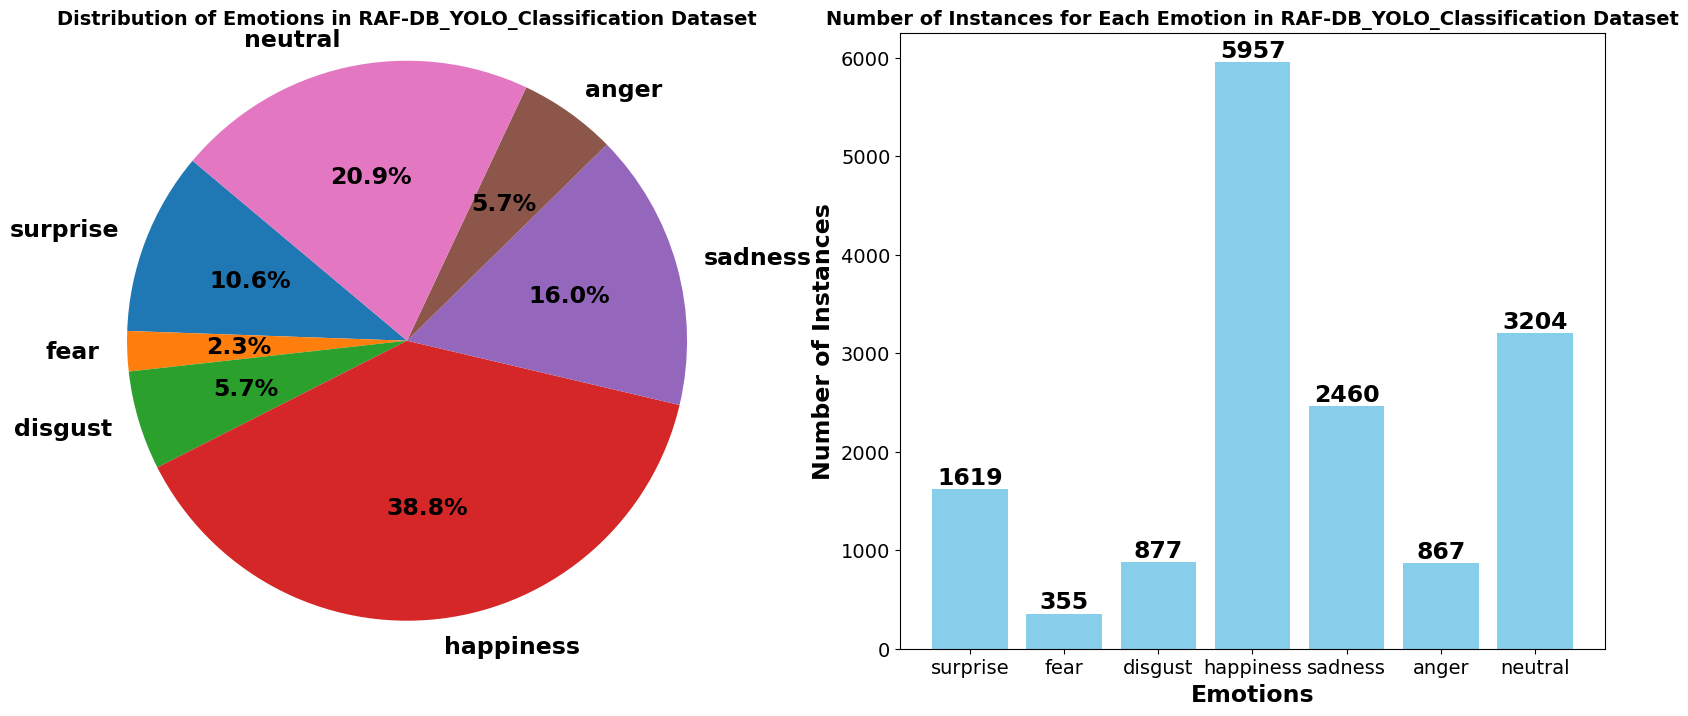

In [14]:
# TOTAL
dataset_path = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification'
dataset_name = 'RAF-DB_YOLO_Classification Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

surprise: 1137 instances
fear: 273 instances
disgust: 634 instances
happiness: 4175 instances
sadness: 1709 instances
anger: 599 instances
neutral: 2210 instances
Total number of txt files read: 10737


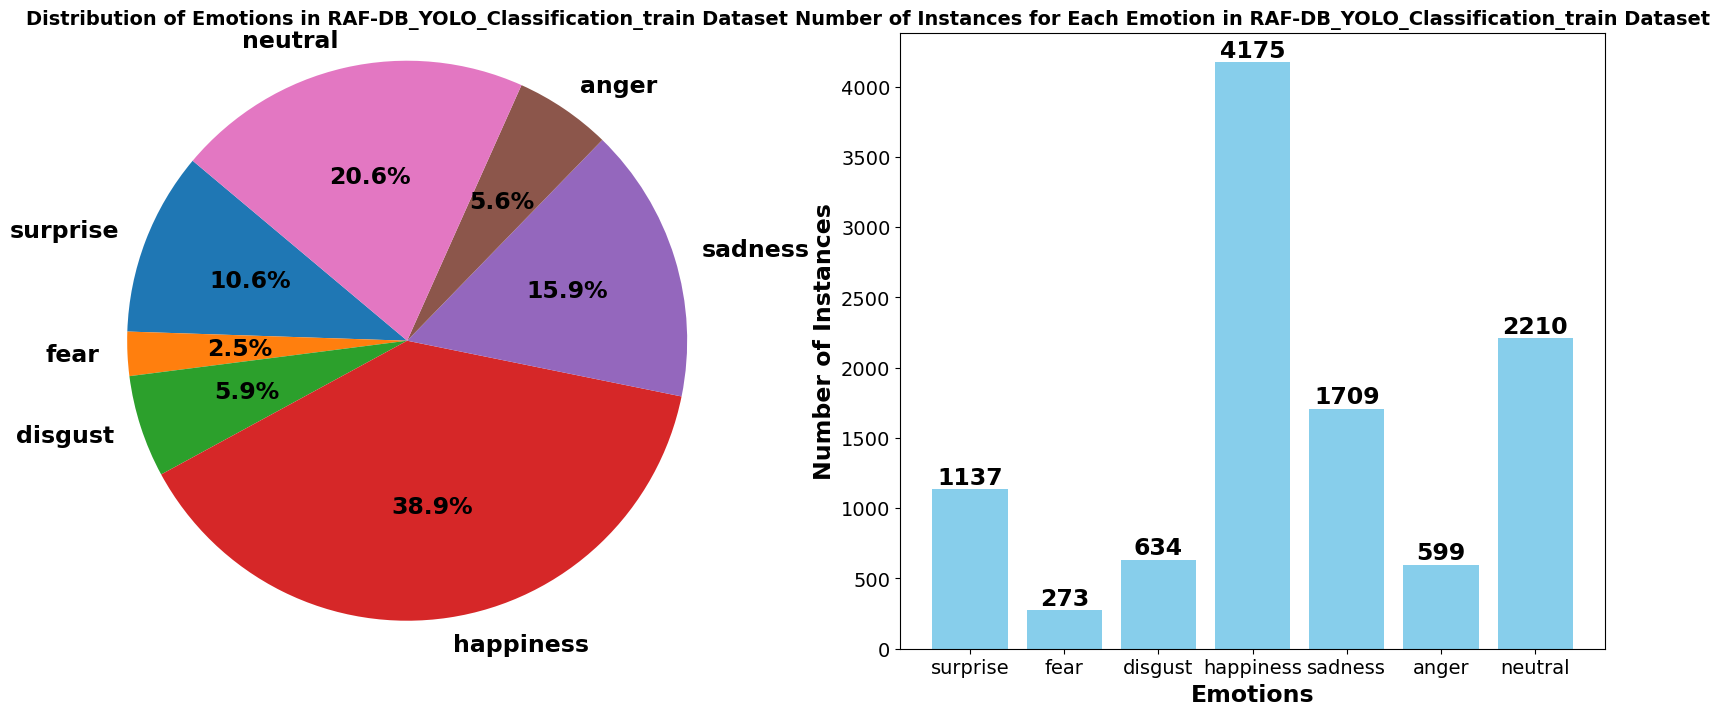

In [15]:
# train
dataset_path = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/train'
dataset_name = 'RAF-DB_YOLO_Classification_train Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

surprise: 329 instances
fear: 49 instances
disgust: 160 instances
happiness: 1167 instances
sadness: 523 instances
anger: 189 instances
neutral: 650 instances
Total number of txt files read: 3067


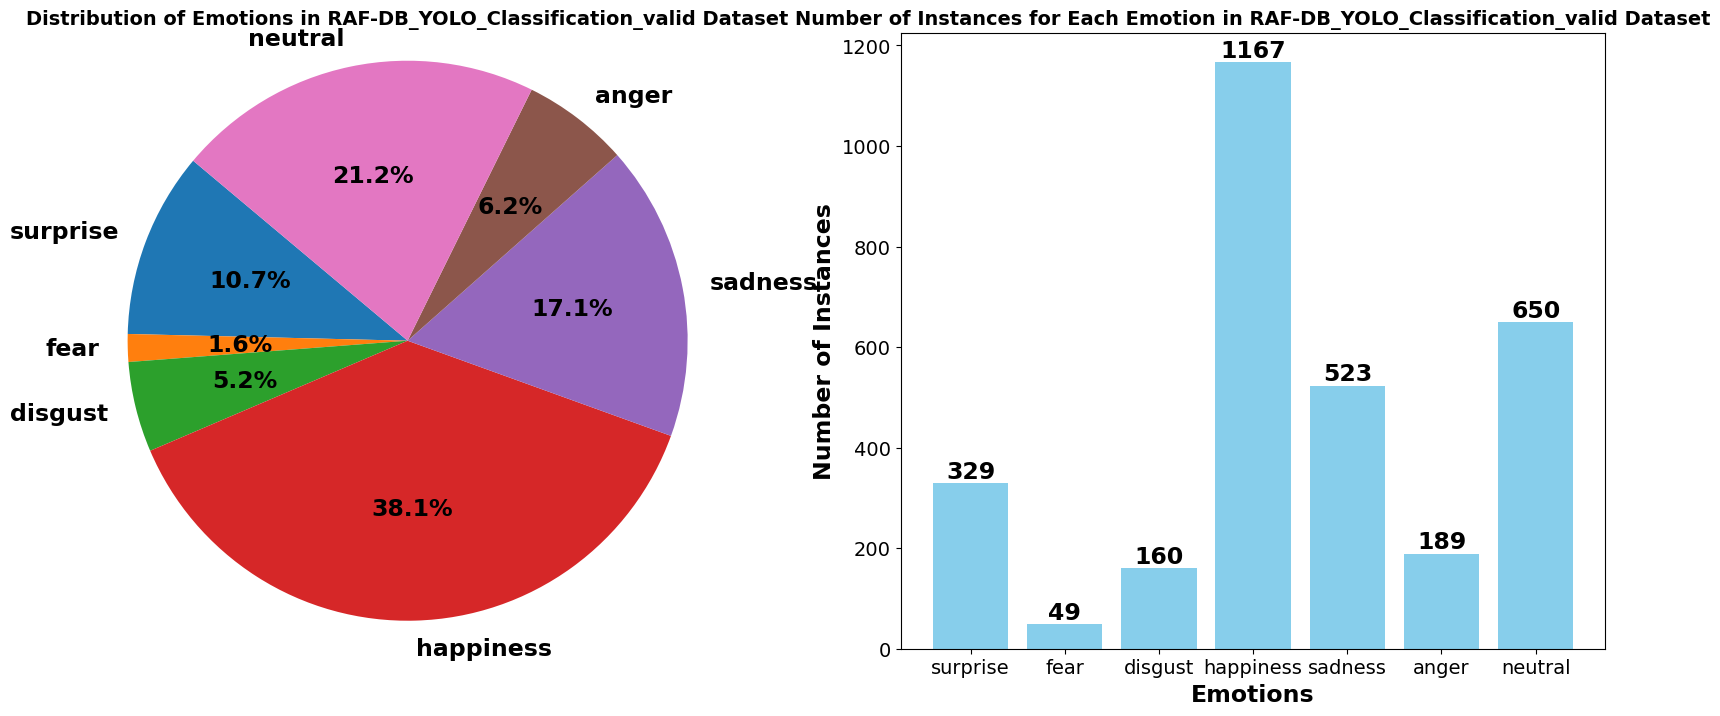

In [16]:
# valid
dataset_path = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/valid'
dataset_name = 'RAF-DB_YOLO_Classification_valid Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

surprise: 153 instances
fear: 33 instances
disgust: 83 instances
happiness: 615 instances
sadness: 228 instances
anger: 79 instances
neutral: 344 instances
Total number of txt files read: 1535


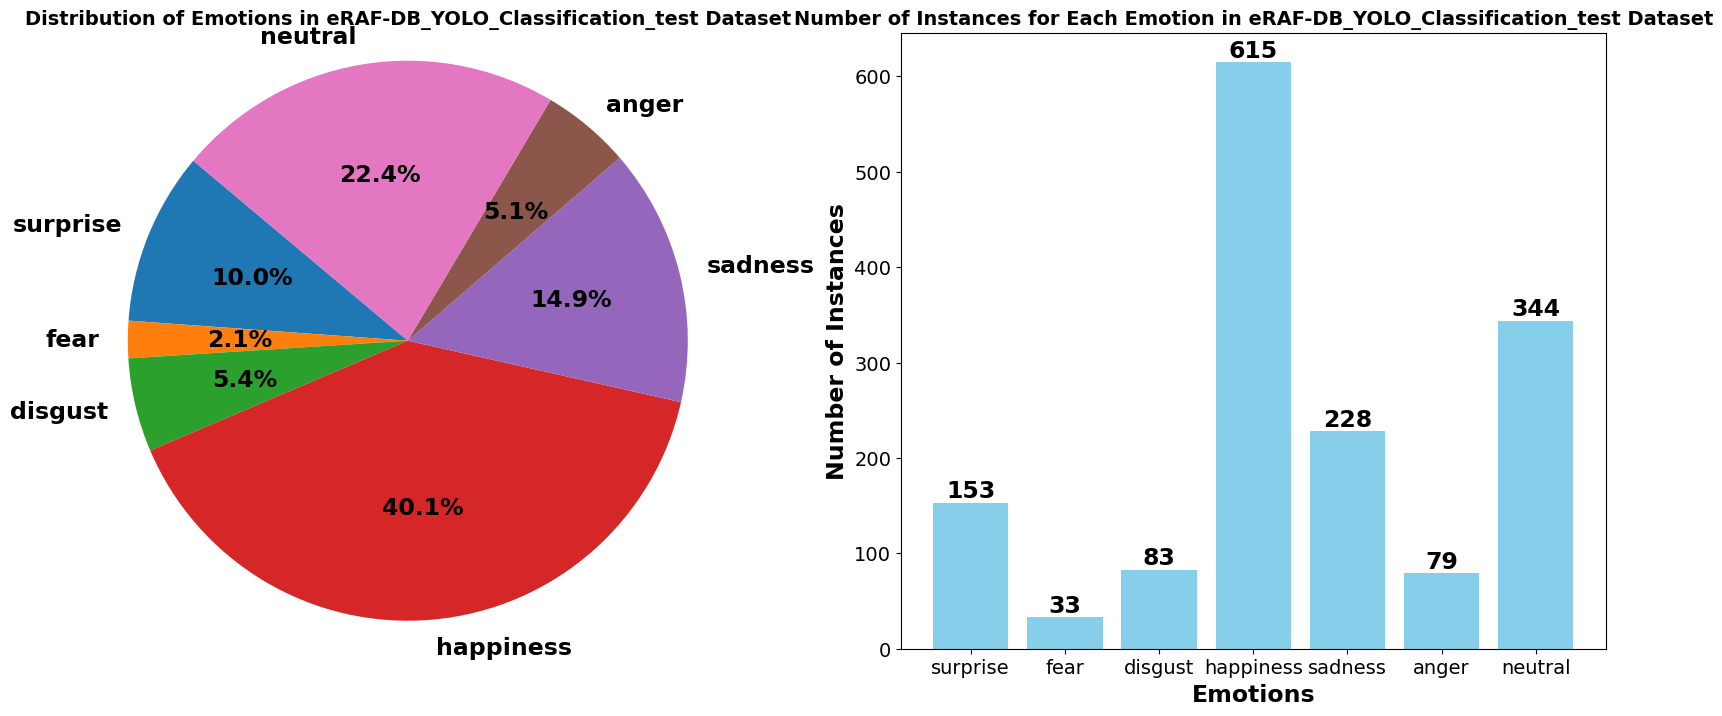

In [18]:
# test
dataset_path = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/test'
dataset_name = 'eRAF-DB_YOLO_Classification_test Dataset'
analyze_yolo_dataset_total(dataset_path, dataset_name)

### Output Checking

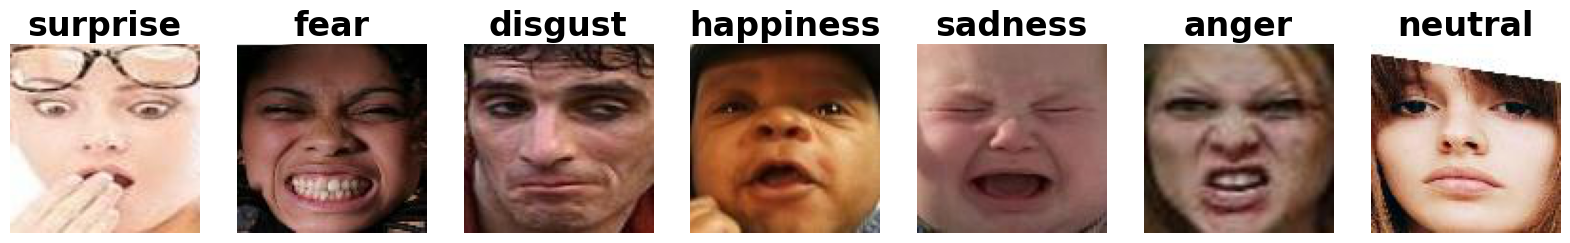

In [19]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/Users/piglet/Desktop/workspace/RAFDB_YOLO_classification/train'
images_path = os.path.join(dataset_path, 'images')  
labels_path = os.path.join(dataset_path, 'labels')  

emotions = ['surprise', 'fear', 'disgust', 'happiness', 'sadness', 'anger', 'neutral']

emotion_to_index = {emotion: i for i, emotion in enumerate(emotions)}

found_images = {emotion: None for emotion in emotions}

for label_file in os.listdir(labels_path):
    if label_file.endswith('.txt'):
        with open(os.path.join(labels_path, label_file), 'r') as file:
            lines = file.readlines()
            for line in lines:
                parts = line.strip().split()
                category_index = int(parts[0])
                for emotion, index in emotion_to_index.items():
                    if category_index == index and found_images[emotion] is None:
                        image_file = label_file.replace('.txt', '.jpg')
                        image_file_with_path = os.path.join(images_path, image_file)
                        if os.path.exists(image_file_with_path):
                            found_images[emotion] = image_file_with_path
                            break
            if all(found_images.values()):
                break
fig = plt.figure(figsize=(20, 10))
for i, (emotion, img_path) in enumerate(found_images.items()):
    if img_path is not None:
        img = Image.open(img_path)
        ax = fig.add_subplot(1, len(emotions), i + 1)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(emotion, fontsize=24, fontweight='bold')  

plt.show()
